## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import cross_val_score
import pickle

path_to_data = Path('.')
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None)
# data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=10000)
print(data.shape)
cards = [
    # Diamonds
    'DA', 'DK', 'DQ', 'DJ', 'D10', 'D9', 'D8', 'D7', 'D6',
    # Hearts
    'HA', 'HK', 'HQ', 'HJ', 'H10', 'H9', 'H8', 'H7', 'H6',
    # Spades
    'SA', 'SK', 'SQ', 'SJ', 'S10', 'S9', 'S8', 'S7', 'S6',
    # Clubs
    'CA', 'CK', 'CQ', 'CJ', 'C10', 'C9', 'C8', 'C7', 'C6'
]

forehand = ['FH']
user = ['user']
trump = ['trump']
data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.trump = data.trump.astype('category')
feature_columns = cards + forehand

# data[cards + forehand] = data[cards + forehand].astype(bool)
#data.trump = data.trump.cat.rename_categories({0: 'DIAMONDS', 1: 'HEARTS', 2: 'SPADES', 3: 'CLUBS', 4: 'OBE_ABE', 5: 'UNE_UFE', 6: 'PUSH', 10: 'PUSH'})
data.head()

(359825, 39)


,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


Check dataset

In [20]:
cardData = data.loc[:, cards]
# cardData.at[4, 'DA'] = 1
indexesWithMoreThanNineCards = []
for idx, row in cardData.iterrows():
    if (row.sum() > 9):
        indexesWithMoreThanNineCards.append(idx)
assert len(
    indexesWithMoreThanNineCards) == 0, f"There data contains illegal values \n Indexes with illegal card count: {str(indexesWithMoreThanNineCards)}"


## Feature Engineering

In [1]:
feature_columns = cards + forehand

for color in 'DHSC':
    # Jack and nine combination
    new_col = '{}_J9'.format(color)
    data[new_col] = data['{}J'.format(color)] & data['{}9'.format(color)]
    feature_columns.append(new_col)

    new_col = '{}_AKQ'.format(color)
    data[new_col] = data['{}A'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]

NameError: name 'cards' is not defined

## Split to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data.trump, test_size=0.2,
                                                    stratify=data.trump, random_state=42)
X_train.head()

# Classifier

### Logistic Regression Classifier

In [2]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

NameError: name 'cross_val_score' is not defined

Mean accuracy over 5 folds is 0.6431

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

Mean accuracy over 5 folds is 0.6422


100 trees = 0.6404,
200 trees = 0.6422

### SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

Mean accuracy over 5 folds is 0.5574


5 n = 0.5574

## GradineBoost

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

Mean accuracy over 5 folds is 0.6568


0.6568

## SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

Mean accuracy over 5 folds is 0.6221


0.6221

## LinearSVC

In [16]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))

Mean accuracy over 5 folds is 0.6418


## MLPClassifier -> ANN

In [57]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", batch_size=1024)
result = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
print("Mean accuracy over 5 folds is {:.4}".format(np.mean(result)))


Mean accuracy over 5 folds is 0.6556


Mean accuracy over 5 folds is 0.5945
Mean accuracy over 5 folds is 0.5971
Mean accuracy over 5 folds is 0.595
Mean accuracy over 5 folds is 0.6191


In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", batch_size=1024)
model.fit(X_train, y_train)


MLPClassifier(batch_size=1024)

# Safe Model

In [9]:
import pickle

pkl_filename = "mlp_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)



# Load and evaluate Model

In [4]:
# Load from file
from sklearn.metrics import accuracy_score, f1_score

pkl_filename = "./models/mlp_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

y_pred = pickle_model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.6617383450288334


C:\Users\Dave\.virtualenvs\DL4G-xN77NjMz\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Dave\.virtualenvs\DL4G-xN77NjMz\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### MLP with Tensor flow

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 30)                1380      
                                                                 
 dense_49 (Dense)            (None, 15)                465       
                                                                 
 dense_50 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
282/282 [==============================] - 1s 1ms/step - loss: -204.9836 - accuracy: 0.0862
Epoch 2/1500
282/282 [==============================] - 0s 1ms/step - loss: -3378.1416 - accuracy: 0.0864
Epoch 3/1500
282/282 [==============================] - 0s 1ms/step - loss: -15054.5322 - accuracy: 0.08

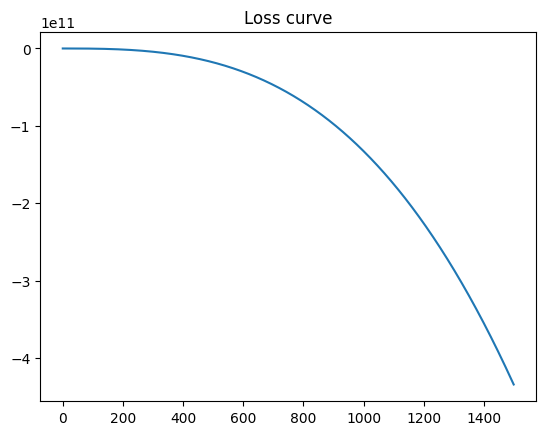

2249/2249 [==============================] - 1s 549us/step
Accuracy: 0.0864


In [106]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score

dataset_dim = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, input_shape=(dataset_dim,), activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=1024, epochs=1500)


def plot_costs(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)
    ax.set_title("Loss curve")
    plt.show()


plot_costs(history.history["loss"])

y_pred = model.predict(X_test)
# y_pred = np.array(y_pred > 0.5, dtype=int).squeeze()

accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
# print("F1: %.4f" % f1)

## Evaluate Classifier

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Classifier names
names = [
    "Logistic Regression",
    "Random Forest",
    "SVC",
    "KNeighborsClassifier",
    "GradientBoostingClassifier",
    "GaussianProcessClassifier"
    "GaussianNB",
    "RBF",
    "SGDClassifier",
    "DecisionTreeClassifier",
    "MLPClassifier"
]

# Classifiers
classifiers = [
    LogisticRegression(solver='lbfgs', multi_class='multinomial'),
    # set these to avoid a FutureWarning with scikit-lean < 0.22
    RandomForestClassifier(n_estimators=200),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    GaussianProcessClassifier(),
    GaussianNB(),
    RBF(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier()

]

# Hyperparameter grid to search per classifier
parameters = [
    {'C': [0.5, 1.0, 2.0]},
    {'max_depth': [5, 10]},
    {},
    {'n_neighbors': [1, 3, 5, 6, 10]},
    {},
    {},
    {},
    {},
    {},
    {},
    {}
]

list(zip(names, parameters))

[('Logistic Regression', {'C': [0.5, 1.0, 2.0]}),
 ('Random Forest', {'max_depth': [5, 10]}),
 ('SVC', {}),
 ('KNeighborsClassifier', {'n_neighbors': [1, 3, 5, 6, 10]}),
 ('GradientBoostingClassifier', {}),
 ('GaussianProcessClassifierSGDClassifier', {})]

In [ ]:
from sklearn.model_selection import GridSearchCV

results = []

for name, classifier, params in zip(names, classifiers, parameters):
    print("Grid search for {}".format(name))
gs = GridSearchCV(classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best accuracy score found: {:.3f} with best estimator: {}\n".format(gs.best_score_, gs.best_estimator_))
results.append([name, gs.best_score_, gs.best_estimator_])

results

Grid search for Logistic Regression
Best accuracy score found: 0.637 with best estimator: LogisticRegression(multi_class='multinomial')

Grid search for Random Forest
Best accuracy score found: 0.594 with best estimator: RandomForestClassifier(max_depth=10, n_estimators=200)

Grid search for SVC


## Final Score

In [1]:
# Probably not the best :-)
clf = LogisticRegression(C=0.5, solver='lbfgs', multi_class='multinomial')

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

y_pred = clf.fit(X_train, y_train)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

C:\Users\Dave\.virtualenvs\DL4G-xN77NjMz\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dave\.virtualenvs\DL4G-xN77NjMz\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dave\.virtualenvs\DL4G-xN77NjMz\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
